In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

## 1. Perceptrón a mano

a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [2]:
def output(entradas,pesos,bias):
    resultado=np.dot(entradas,pesos) + bias
    if(resultado>=0):
        return 1
    else:
        return 0

b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

In [3]:
def Perceptron_training(x_train, y_train, tasa, w, bias = 0):
    m = len(x_train)
    for i in range(m):
        predicted = output(x_train[i], w, bias)
        
        if(y_train[i] != predicted):
            if(y_train[i] == 1):
                w += tasa * x_train[i]
            else:
                w -= tasa * x_train[i]
    return w


c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.

Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

In [4]:
#Version modificada de percptron_training(...), esta funcion devuelve un array con los pesos modificados en cada iteracion

def Perceptron_training_W_return(x_train, y_train, random_train, tasa, w, bias = 0):
    m = len(random_train)
    pesos_por_iteracion = np.empty((m, x_train.shape[1]))
    pos_w = 0
    for i in random_train:
        predicted = output(x_train[i], w, bias)
        
        if(y_train[i] != predicted):
            if(y_train[i] == 1):
                w += tasa * x_train[i]
            else:
                w -= tasa * x_train[i]
        pesos_por_iteracion[pos_w] = w
        pos_w += 1
    return pesos_por_iteracion

def accuracy(X, Y, random_test, W):
    m = len(W)
    n = len(random_test)
    accuracy_list = np.zeros(m)
    for i in range(m):
        aciertos = 0
        for j in random_test:
            if(Y[j] == output(X[j], W[i], 0)):
                aciertos += 1
        accuracy_list[i] = aciertos/n #tasa de exactitud para W[i]    
    return accuracy_list


<div class="alert alert-block alert-info">Dividiremos el set de datos iniciales en una parte de training (75%) y en otra de testing (25%). Generados a partir de números aleatorios</div>

In [5]:
X_train,y_train = load_breast_cancer(return_X_y=True)
m = len(X_train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(m) ] #add columns of 1's if you want


random_train =random.sample(range(m), k=round(569*0.75)) #Devuelve una muestra de k numeros aleatorios no repetidos en el rango de m
random_train.sort()

random_test = []
for i in range(m):
    if i not in random_train:
        random_test.append(i)


<div class="alert alert-block alert-info"> Medimos el tiempo de entrenamiento y graficamos la exactitud usando los datos de trainig y testing de la celda anterior.</div>

El tiempo de entreamiento corresponde a: 0.019971132278442383 segundos


Text(0.5,1,'Accuracy per Iteration')

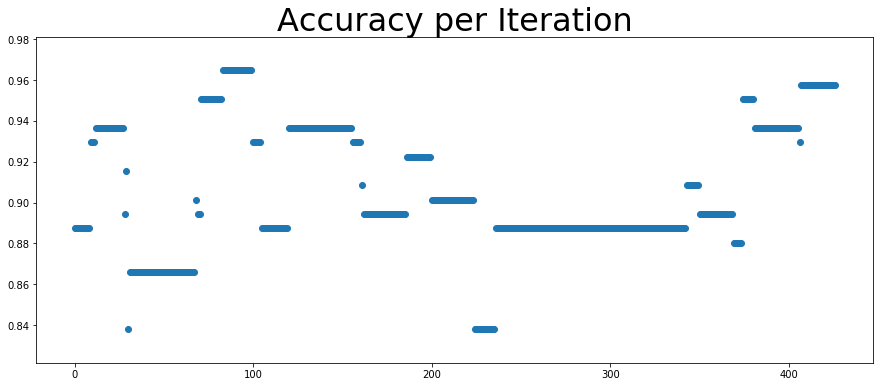

In [6]:
pesos_c = np.zeros(len(X_train[0]))

start = time.time()
lista_pesos = Perceptron_training_W_return(X_train, y_train, random_train, 0.1, pesos_c)
end = time.time()

print("El tiempo de entreamiento corresponde a:", end - start, "segundos")

x_axis = np.arange(len(random_train))  
y_axis = accuracy(X_train, y_train, random_test, lista_pesos)

plt.rcParams["figure.figsize"] = (15,6)

plt.scatter(x_axis, y_axis)
plt.title("Accuracy per Iteration", fontsize = 32)


d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

In [7]:
#lista.pop(0)

def threshold_forgetron(x_train, y_train, memory_array, i_actual):
    sum = 0
    if (len(memory_array) == 0):
        return 0
    for i in range(len(memory_array)):
        sum += y_train[i_actual]*np.dot(x_train[memory_array[i]], x_train[i_actual])
    if(sum >= 0):
        return 1
    else:
        return 0
    
    
def forgetron(x_train, y_train, random_train):
    memory_array = []
    array_restricciones = []
    for i in random_train:
        if(y_train[i] != threshold_forgetron(x_train, y_train, memory_array, i)):
            memory_array.append(i)
        if(len(memory_array) > 10):
            memory_array.pop(0)
        a = memory_array.copy()
        array_restricciones.append(a)
    return array_restricciones

def accuracy_forgetron(X, Y, random_test, array_restricciones):
    m = len(array_restricciones) 
    n = len(random_test)
    accuracy_list = np.zeros(m)
    for i in range(m):
        aciertos = 0
        for j in random_test:
            if(Y[j] == threshold_forgetron(X, Y, array_restricciones[i], j)):
                aciertos += 1
        accuracy_list[i] = aciertos/n     
    return accuracy_list

e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

El tiempo de entreamiento corresponde a: 0.015978336334228516 segundos


Text(0.5,1,'Accuracy per Iteration')

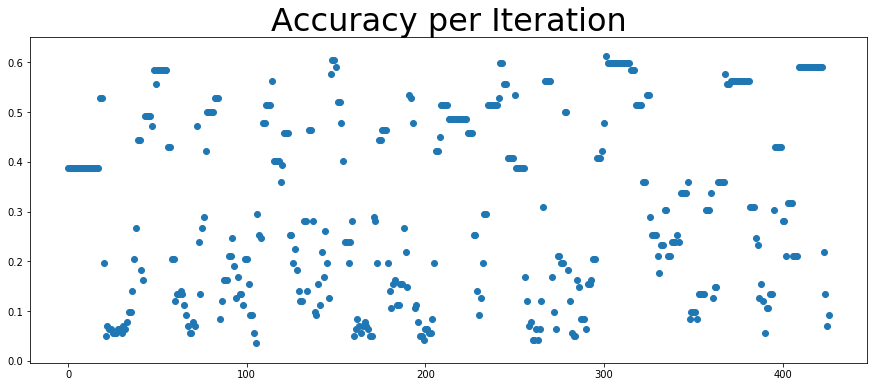

In [8]:
start = time.time()
lista_restricciones = forgetron(X_train, y_train, random_train)
end = time.time()

accuracy_forgetron(X_train, y_train, random_test, lista_restricciones)


print("El tiempo de entreamiento corresponde a:", end - start, "segundos")

x_axis = np.arange(len(random_train))  
y_axis = accuracy_forgetron(X_train, y_train, random_test, lista_restricciones)

plt.rcParams["figure.figsize"] = (15,6)

plt.scatter(x_axis, y_axis)
plt.title("Accuracy per Iteration", fontsize = 32)

f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.


In [9]:
def sigmoidal(entrada):
    entrada=round(entrada,2)
    denominador=1 + np.exp(-entrada)
    return round(1/denominador,2)

def g(entradas,pesos,bias):
    resultado=np.dot(entradas,pesos) + bias
    resultado=sigmoidal(resultado)
    return resultado


g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [10]:
import math
def binary_cross(y,g):
        if(g==0):
            print("no se puede log 0 no existe")
            return -1
        elif((1-g)==0):
            print("no se puede log 0 no existe")
            return -1
        c=-y*math.log(g)-((1-y)*math.log(1-g))
        return round(c,2)

h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

In [11]:
def grad_l(X,Y,pesos,bias=0):
    a=g(X,pesos,bias)
    return X*(a-Y)

 i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.


In [12]:
def perceptron_binary_cross(x_train, y_train, tasa, w, bias = 0):
    m = len(x_train)
    for i in range(m):
        w-=tasa*grad_l(x_train[i],y_train[i],w)
    return w
        







In [13]:
pesos_i = np.zeros(len(X_train[0]))

perceptron_binary_cross(X_train, y_train, 0.7, pesos_i)


array([-2.73326847, -1.12935579, -2.85896416, -2.94709195, -0.219157  ,
       -0.36393461, -2.62942246, -2.82469254, -1.35757209,  1.3501539 ,
       -2.06441516,  0.02367379, -3.35643713, -2.97045974, -3.80795291,
        3.47920719,  2.48733484, -0.30184394, -0.79464881,  4.83414496,
       -3.71678412, -3.78443749, -4.17334193, -3.96368419, -3.08813148,
       -0.23392064, -1.72255842, -3.44612665, -3.94935561,  0.10552685,
        2.107     ])